In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census

airdatacsv ='../ProjectOne/Annual_Averages_by_city.csv'


# Read Purchasing File and store into Pandas data frame
airdata_df = pd.read_csv(airdatacsv)
austin_df = pd.read_csv('../ProjectOne/Census_ACS5_Data/Austin_Census.csv')
nash_df = pd.read_csv('../ProjectOne/Census_ACS5_Data/Nashville_Census.csv')
dallas_df = pd.read_csv('../ProjectOne/Census_ACS5_Data/dallas_Census.csv')
atl_df = pd.read_csv('../ProjectOne/Census_ACS5_Data/Atlanta_Census.csv')

In [9]:
austin_df['Name'] = 'Austin'
nash_df['Name'] = 'Nashville'
dallas_df['Name'] = 'Dallas'
atl_df['Name'] = 'Atlanta'

allpop_df = austin_df
allpop_df = allpop_df.append(nash_df)
allpop_df = allpop_df.append(dallas_df)
allpop_df = allpop_df.append(atl_df)
allpop_df.head()
pd.merge()

,Name,Year,Population,Vehicles,Vehicles (M),Vehicles (F),Transit Solo Auto,Transit Carpool,Transit Public Transp.,Transit Walked,Transit Other,Transit Total,New Transit Total,Solo Auto %,Carpool %,Public Transp. %,Walked %,Other %
0,Austin,2009,1589393,652425,364205,288220,607740,100696,22434,13280,21618,810017,765768.0,79.4,13.1,2.9,1.7,2.8
1,Austin,2010,1627571,662555,361790,300765,618506,98933,21479,13925,21248,823119,774091.0,79.9,12.8,2.8,1.8,2.7
2,Austin,2011,1681167,677430,367865,309560,633174,99289,21987,14628,22131,845297,791209.0,80.0,12.5,2.8,1.8,2.8
3,Austin,2012,1731777,694125,375025,319100,650154,97904,22229,15916,23316,866411,809519.0,80.3,12.1,2.7,2.0,2.9
4,Austin,2013,1782032,718205,386880,331330,675639,94559,21640,16326,22104,890006,830268.0,81.4,11.4,2.6,2.0,2.7


In [36]:
airdata_df[ (airdata_df['CBSA'] == 'Nashville-Davidson--Murfreesboro--Franklin, TN')]['Name'] = 'Nashville'
airdata_df

for index, row in airdata_df.iterrows() :
    if (row['CBSA'] == 'Nashville-Davidson--Murfreesboro--Franklin, TN') :
        airdata_df.iloc[index, 0] = 'Nashville'
    elif (row['CBSA'] == 'Dallas-Fort Worth-Arlington, TX') :
        airdata_df.iloc[index, 0] = 'Dallas'
    elif (row['CBSA'] == 'Atlanta-Sandy Springs-Roswell, GA') :
        airdata_df.iloc[index, 0] = 'Atlanta'
    elif (row['CBSA'] == 'Austin-Round Rock, TX') :
        airdata_df.iloc[index, 0] = 'Austin'
airdata_df.head()

airdata_df= airdata_df.rename(columns={"CBSA": "City"})
allpop_df= allpop_df.rename(columns={"Name": "City"})

In [45]:
all_data = pd.merge(airdata_df, allpop_df, left_on= ['City', 'Year'], right_on= ['City', 'Year'])
all_data.head()


,City,Year,AQI,Population,Vehicles,Vehicles (M),Vehicles (F),Transit Solo Auto,Transit Carpool,Transit Public Transp.,Transit Walked,Transit Other,Transit Total,New Transit Total,Solo Auto %,Carpool %,Public Transp. %,Walked %,Other %
0,Atlanta,2009,77.884211,5238994,2052480,1090620,961865,1932100,271768,90002,34299,40085,2494475,2368254.0,81.6,11.5,3.8,1.4,1.7
1,Atlanta,2010,83.530201,5125113,1997095,1045905,951190,1881294,261013,81646,32150,41000,2426787,2297103.0,81.9,11.4,3.6,1.4,1.8
2,Atlanta,2011,86.245509,5213854,2003545,1042565,960980,1887598,260845,79623,32523,40263,2434425,2300852.0,82.0,11.3,3.5,1.4,1.7
3,Atlanta,2012,77.535211,5291701,2008995,1045940,963055,1893486,260512,77953,32535,37735,2440294,2302221.0,82.2,11.3,3.4,1.4,1.6
4,Atlanta,2013,60.423729,5379176,2013310,1045965,967345,1900270,254574,76142,33625,36652,2440839,2301263.0,82.6,11.1,3.3,1.5,1.6


In [51]:
all_data['Vehicles per Capita'] = all_data['Vehicles']/(all_data['Population'])
atl_data = all_data[(all_data['City'] == 'Atlanta')]
nash_data = all_data[(all_data['City'] == 'Nashville')]
austin_data = all_data[(all_data['City'] == 'Austin')]
dallas_data = all_data[(all_data['City'] == 'Dallas')]

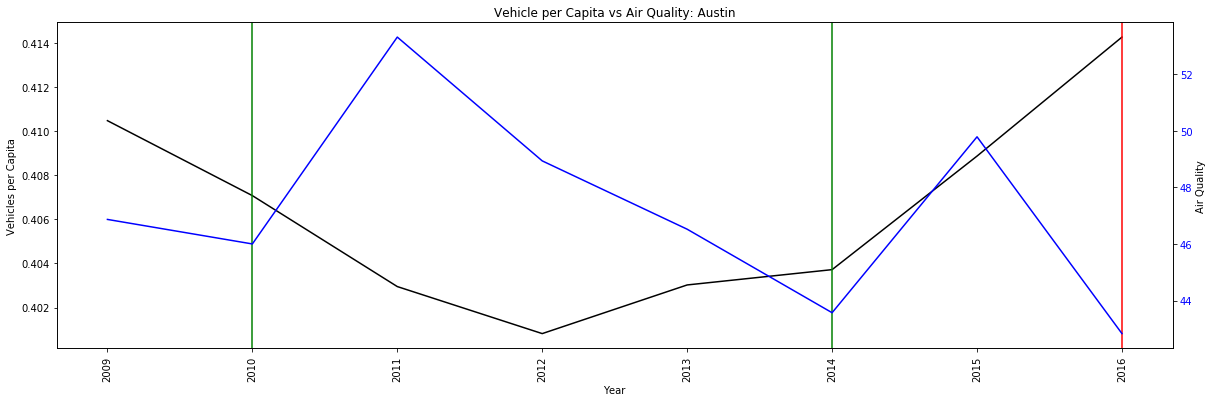

In [67]:
x_axis = np.arange(len(austin_data["Year"]))
tick_locations = [value+0.4 for value in x_axis]

fig, ax1 = plt.subplots(figsize=(20,6))


#color = 'tab:red'
ax1.set_xlabel("Year")
ax1.set_ylabel("Vehicles per Capita")
ax1.plot(x_axis, austin_data['Vehicles per Capita'], color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.set_xticks(list(range(0, len(austin_data["Year"]))))
ax1.set_xticklabels(austin_data["Year"], rotation="vertical")
ax1.axvline(1, ymin=0, ymax=1, color='g')
ax1.axvline(5, ymin=0, ymax=1, color='g')
ax1.axvline(7, ymin=0, ymax=1, color='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
ax2.set_ylabel("Air Quality")  # we already handled the x-label with ax1
ax2.plot(x_axis, austin_data["AQI"], color='b')
ax2.tick_params(axis='y', labelcolor='b')


plt.title("Vehicle per Capita vs Air Quality: Austin")

plt.savefig('Vehicle per Capita vs Air Quality: Austin.png')
plt.show()

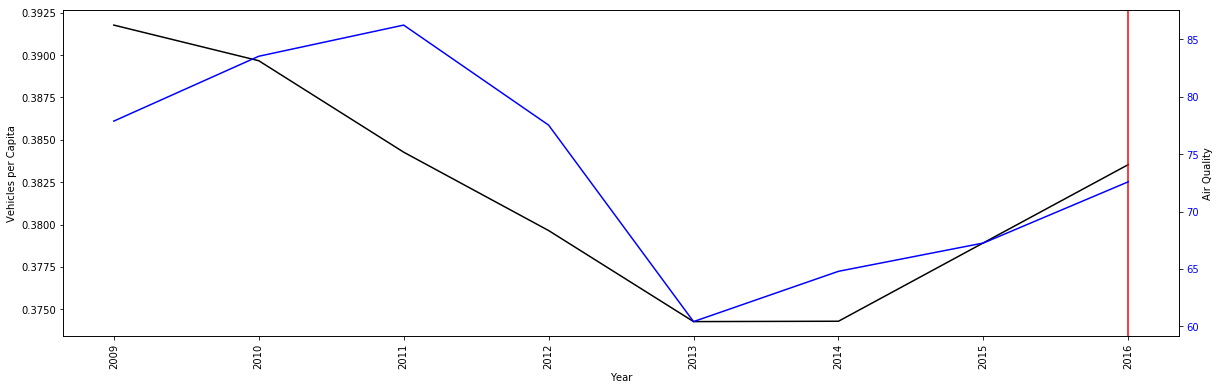

In [68]:
x_axis = np.arange(len(atl_data["Year"]))
tick_locations = [value+0.4 for value in x_axis]

fig, ax1 = plt.subplots(figsize=(20,6))


#color = 'tab:red'
ax1.set_xlabel("Year")
ax1.set_ylabel("Vehicles per Capita")
ax1.plot(x_axis, atl_data['Vehicles per Capita'], color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.set_xticks(list(range(0, len(atl_data["Year"]))))
ax1.set_xticklabels(atl_data["Year"], rotation="vertical")
ax1.axvline(7, ymin=0, ymax=1, color= 'r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
ax2.set_ylabel("Air Quality")  # we already handled the x-label with ax1
ax2.plot(x_axis, atl_data["AQI"], color='b')
ax2.tick_params(axis='y', labelcolor='b')

plt.savefig('Vehicle per Capita vs Air Quality: Atlanta.png')
plt.show()

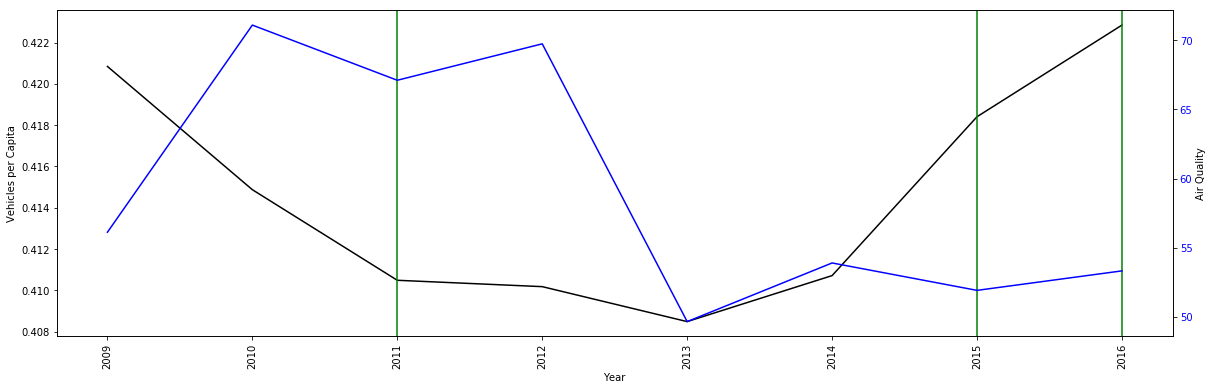

In [69]:
x_axis = np.arange(len(nash_data["Year"]))
tick_locations = [value+0.4 for value in x_axis]

fig, ax1 = plt.subplots(figsize=(20,6))


#color = 'tab:red'
ax1.set_xlabel("Year")
ax1.set_ylabel("Vehicles per Capita")
ax1.plot(x_axis, nash_data['Vehicles per Capita'], color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.set_xticks(list(range(0, len(nash_data["Year"]))))
ax1.set_xticklabels(nash_data["Year"], rotation="vertical")
ax1.axvline(2, ymin=0, ymax=1, color='g')
ax1.axvline(6, ymin=0, ymax=1, color='g')
ax1.axvline(7, ymin=0, ymax=1, color='g')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
ax2.set_ylabel("Air Quality")  # we already handled the x-label with ax1
ax2.plot(x_axis, nash_data["AQI"], color='b')
ax2.tick_params(axis='y', labelcolor='b')


plt.savefig('Vehicle per Capita vs Air Quality: Nashville.png')
plt.show()

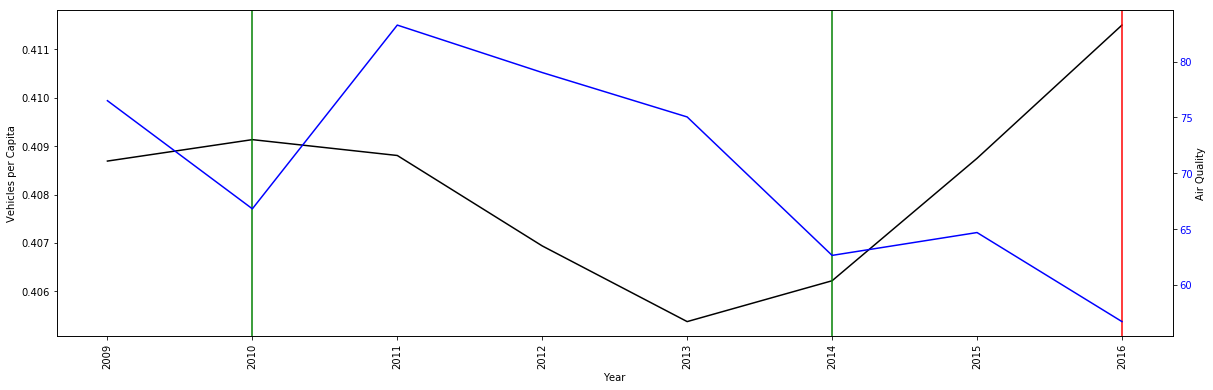

In [70]:
x_axis = np.arange(len(dallas_data["Year"]))
tick_locations = [value+0.4 for value in x_axis]

fig, ax1 = plt.subplots(figsize=(20,6))


#color = 'tab:red'
ax1.set_xlabel("Year")
ax1.set_ylabel("Vehicles per Capita")
ax1.plot(x_axis, dallas_data['Vehicles per Capita'], color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.set_xticks(list(range(0, len(dallas_data["Year"]))))
ax1.set_xticklabels(dallas_data["Year"], rotation="vertical")
ax1.axvline(1, ymin=0, ymax=1, color='g')
ax1.axvline(5, ymin=0, ymax=1, color='g')
ax1.axvline(7, ymin=0, ymax=1, color='r')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

#color = 'tab:blue'
ax2.set_ylabel("Air Quality")  # we already handled the x-label with ax1
ax2.plot(x_axis, dallas_data["AQI"], color='b')
ax2.tick_params(axis='y', labelcolor='b')


plt.savefig('Vehicle per Capita vs Air Quality: Dallas.png')
plt.show()